## ***#--> Mohamed Ibrahim Hussein***
## ***#--> 2305026***

`# Load necessary libraries`

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

`# Set random seed for reproducibility`

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

`# Load and preprocess the MNIST dataset`

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


`# Normalize pixel values`

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


`# Flatten the 28x28 images into vectors`

In [9]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


`# Convert labels to one-hot encoded format`

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


`# Build the neural network model`

In [13]:
model = Sequential(
    [
        Input(shape=(28*28, )),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

`# Compile the model`

In [18]:
model.compile(
    optimizer= Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

`# Print model summary`

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

`# Train the model`

In [20]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7795 - loss: 0.6295 - val_accuracy: 0.8490 - val_loss: 0.4131
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8645 - loss: 0.3724 - val_accuracy: 0.8530 - val_loss: 0.3940
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8776 - loss: 0.3285 - val_accuracy: 0.8632 - val_loss: 0.3703
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8879 - loss: 0.3012 - val_accuracy: 0.8647 - val_loss: 0.3637
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8934 - loss: 0.2824 - val_accuracy: 0.8657 - val_loss: 0.3733
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9007 - loss: 0.2661 - val_accuracy: 0.8718 - val_loss: 0.3589
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9046 - loss: 0.2524 - val_accuracy: 0.8755 - val_loss: 0.3629
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9085 - loss: 0.2416 - val_accuracy: 0

`# Evaluate the model`

In [21]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [23]:
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 91.12%
Test Accuracy: 87.91%


`# Plot training and validation loss & Acc`

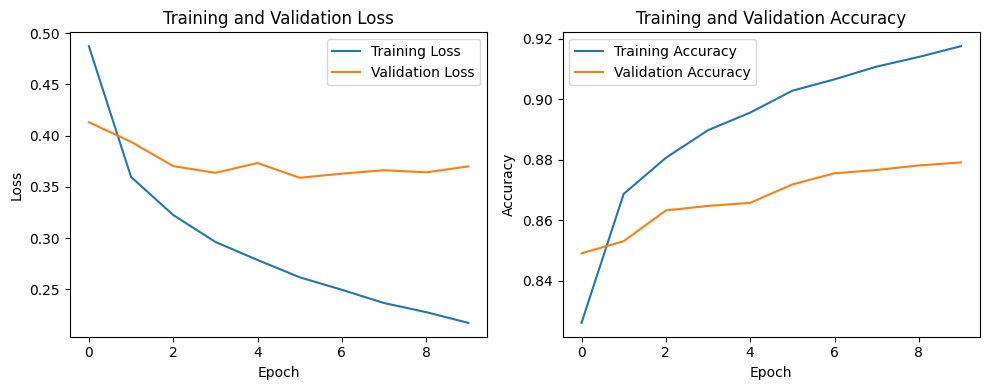

In [50]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.tight_layout()
plt.show()

`# Generate confusion matrix`

In [55]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x800 with 0 Axes>

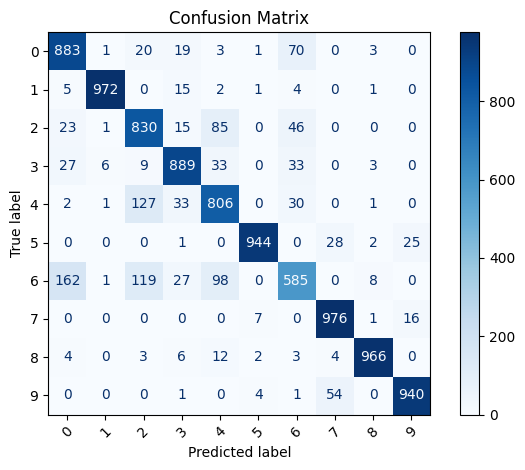

In [57]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

`# Display example predictions`

In [42]:
num_examples = 6
indices = np.random.choice(len(x_test), num_examples, replace=False)
example_images = x_test[indices]
example_labels = y_true_classes[indices]
example_preds = y_pred_classes[indices]

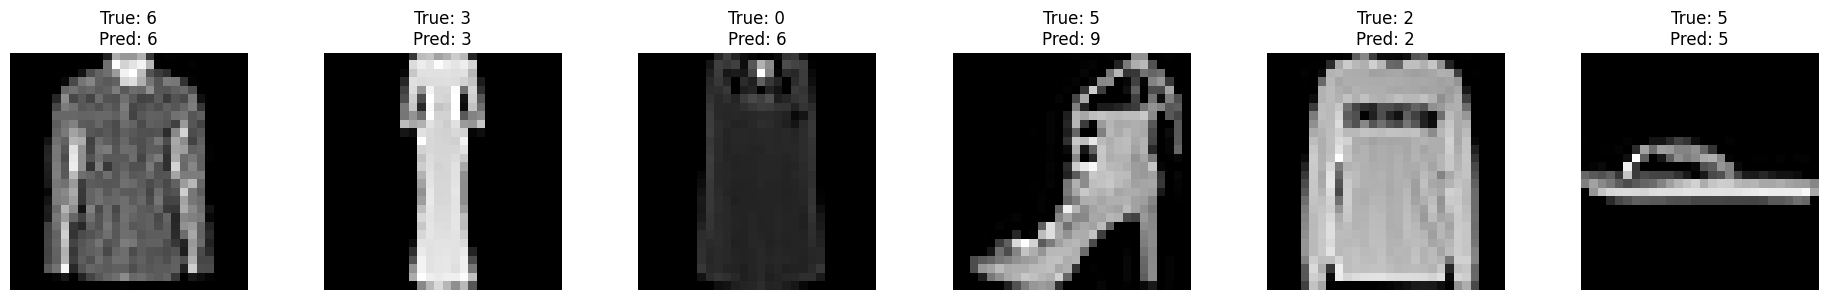

In [46]:
plt.figure(figsize=(19, 3))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(example_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {example_labels[i]}\nPred: {example_preds[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()